# Comprehensive Data Analysis of Malaria Cases in Kenya

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

In [5]:
data = pd.read_csv(r"C:\Users\PC\OneDrive\Desktop\Datasets\malaria_cases.csv")
  

In [6]:
data.head(3)

,county,year,month,value
0,Baringo County,2019,1,4832
1,Bomet County,2019,1,855
2,Bungoma County,2019,1,26851


In [11]:
data.isna().sum()

county    0
year      0
month     0
value     0
dtype: int64

In [8]:
data.year.unique()

array([2019, 2020, 2021], dtype=int64)

In [12]:
data.county.unique()

array(['Baringo County', 'Bomet County', 'Bungoma County', 'Busia County',
       'Elgeyo Marakwet County', 'Embu County', 'Garissa County',
       'Homa Bay County', 'Isiolo County', 'Kajiado County',
       'Kakamega County', 'Kericho County', 'Kiambu County',
       'Kilifi County', 'Kirinyaga County', 'Kisii County',
       'Kisumu County', 'Kitui County', 'Kwale County', 'Laikipia County',
       'Lamu County', 'Machakos County', 'Makueni County',
       'Mandera County', 'Marsabit County', 'Meru County',
       'Migori County', 'Mombasa County', 'Muranga County',
       'Nairobi County', 'Nakuru County', 'Nandi County', 'Narok County',
       'Nyamira County', 'Nyandarua County', 'Nyeri County',
       'Samburu County', 'Siaya County', 'Taita Taveta County',
       'Tana River County', 'Tharaka Nithi County', 'Trans Nzoia County',
       'Turkana County', 'Uasin Gishu County', 'Vihiga County',
       'Wajir County', 'West Pokot County'], dtype=object)

# Descriptive statistics

In [9]:
data.describe()

,year,month,value
count,1692.000000,1692.000000,1692.000000
mean,2020.000000,6.500000,18492.305556
std,0.816738,3.453073,35301.814771
min,2019.000000,1.000000,26.000000
25%,2019.000000,3.750000,908.000000
50%,2020.000000,6.500000,3584.000000
75%,2021.000000,9.250000,17094.250000
max,2021.000000,12.000000,333739.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  1692 non-null   object
 1   year    1692 non-null   int64 
 2   month   1692 non-null   int64 
 3   value   1692 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 53.0+ KB


# Group cases by county from 2019 - 2021

In [13]:
county_cases = data.groupby('county')['value'].sum().sort_values(ascending = False)
county_cases

county
Kakamega County           4938654
Siaya County              3644628
Busia County              3070050
Bungoma County            3029401
Kisumu County             2751394
Migori County             2428367
Vihiga County             1534752
Homa Bay County           1344162
Turkana County            1143060
Kwale County              1086811
Kilifi County              908947
Kisii County               803260
Nandi County               461506
West Pokot County          461084
Mombasa County             443697
Nairobi County             356166
Trans Nzoia County         317842
Baringo County             302601
Kericho County             297104
Uasin Gishu County         256522
Nakuru County              236924
Narok County               196309
Nyamira County             143320
Machakos County            120322
Elgeyo Marakwet County     109281
Kitui County                90291
Kajiado County              86892
Meru County                 76359
Kiambu County               76132
Tharaka

# Group cases by county per year

In [16]:
yearly_caes = data.groupby('year')['value'].sum()
yearly_caes

year
2019     7798172
2020     8609583
2021    14881226
Name: value, dtype: int64

#  Time Series Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


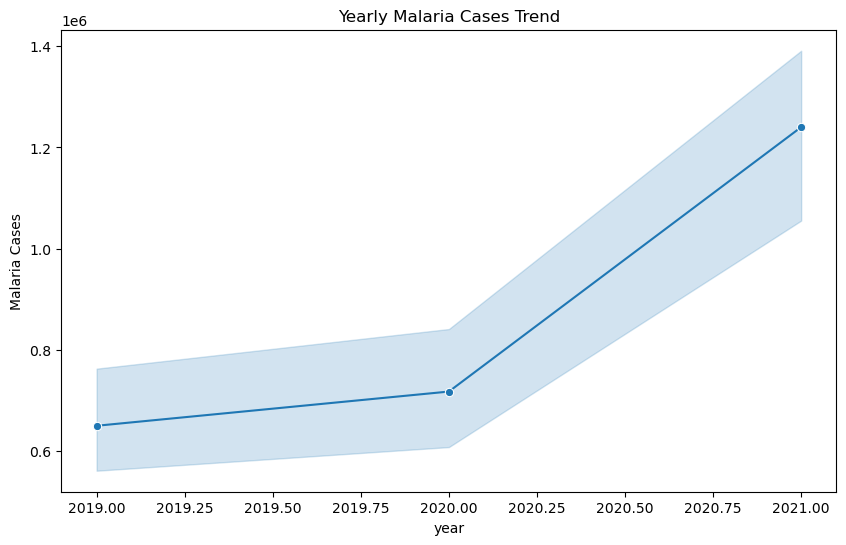

In [32]:
time_series = data.groupby(['year','month'])['value'].sum().reset_index()

# Visualize the trend over time
plt.figure(figsize=(10,6))
sns.lineplot(x='year',y='value',data=time_series,marker='o')
plt.title("Yearly Malaria Cases Trend")
plt.xlabel("year")
plt.ylabel("Malaria Cases")
plt.show()

# Insights
1. Upward Trend:
The number of malaria cases has been steadily increasing over the three-year period. In 2019, the total reported cases were around 0.6 million, increasing slightly in 2020, and then rising sharply to over 1.4 million in 2021.
The sharp rise in 2021 suggests that this year experienced a significant malaria outbreak, which could be linked to various factors such as increased rainfall, changes in mosquito control measures, or other environmental and socio-economic conditions.
2. Uncertainty:
The shaded region around the line represents the confidence interval or uncertainty bounds, which give an indication of the reliability of the data points. As time progresses, the uncertainty increases, particularly in 2021. This could be due to variations in reporting accuracy or other data-related issues during this period.
The wider bounds in 2021 suggest that the malaria situation in this year might be more volatile or that there is a larger range of possible outcomes.
3. Potential Causes:
The spike in 2021 could be attributed to changes in environmental factors such as increased rainfall or temperature, which enhance mosquito breeding.
The COVID-19 pandemic could also have impacted health systems, leading to a decrease in malaria control efforts like spraying and net distribution, thereby contributing to the surge in cases.
## Conclusion
This analysis shows an alarming increase in malaria cases from 2019 to 2021. Immediate interventions should be considered, especially in 2021, where cases spiked significantly.

# Seasonal Trends by Month

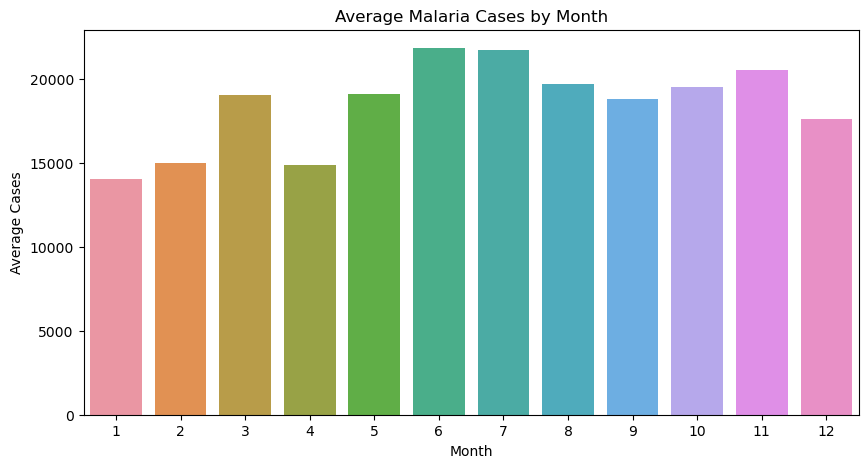

In [25]:
monthly_cases = data.groupby('month')['value'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_cases.index, y=monthly_cases.values)
plt.title('Average Malaria Cases by Month')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.show()

## Line Graph

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

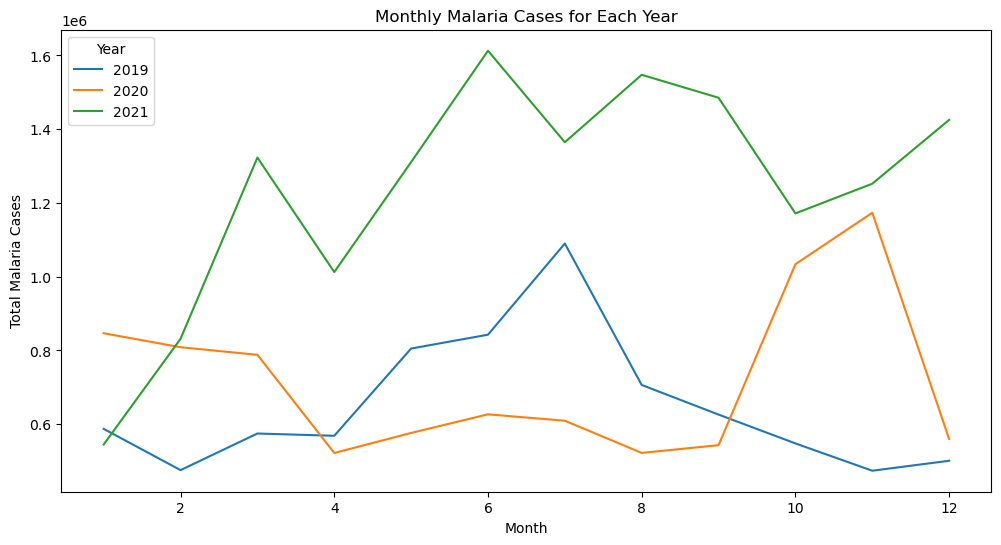

In [31]:
# Group the data by year and month, then calculate the sum of cases
monthly_cases_by_year = data.groupby(['year', 'month'])['value'].sum().reset_index()

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a line plot for each year
for year in monthly_cases_by_year['year'].unique():
    yearly_data = monthly_cases_by_year[monthly_cases_by_year['year'] == year]
    sns.lineplot(x=yearly_data['month'], y=yearly_data['value'], label=str(year))

# Add title and labels
plt.title('Monthly Malaria Cases for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Malaria Cases')

# Add a legend to indicate the year
plt.legend(title='Year')

# Show the plot
plt.show()

## Insights:<br>
- **Seasonality** There is a noticeable pattern where malaria cases tend to peak around the middle of the year (typically during the rainy seasons when mosquitoes breed).
- **Yearly Comparison** 2021 experienced the highest malaria cases, especially in the first half, which might require further investigation into environmental or health management changes during that period.
- **Late-Year Dip** In each year, there seems to be a decrease in malaria cases in the last quarter (October-December), possibly due to cooler, drier weather which limits mosquito breeding.

# Geographical Analysis (by County)

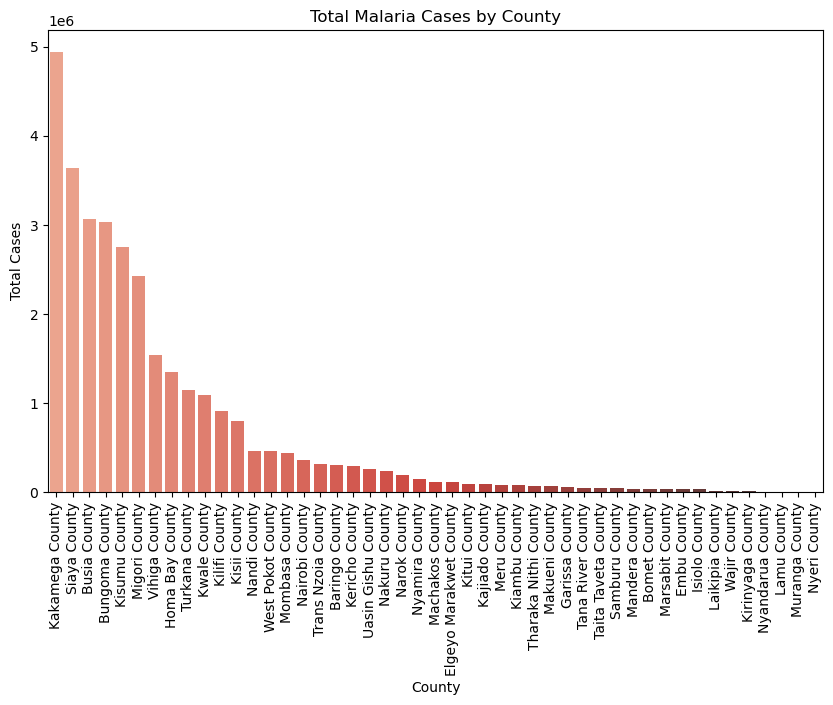

In [29]:
# Total malaria cases per county
county_cases = data.groupby('county')['value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=county_cases.index, y=county_cases.values, palette="Reds_d")
plt.title('Total Malaria Cases by County')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.show()

# Insights and Recommendations
## Western and Lake Region Hotspots: 
- The counties with the highest burden (**Kakamega, Siaya, Busia, Bungoma, and Kisumu**) are in the western part of the country, which is known for its endemic malaria transmission due to its warm and humid climate, ideal for mosquito breeding. Special attention should be given to these areas for malaria prevention and control measures.

## Urban vs. Rural Divide: 
- More urbanized counties, such as Nairobi and Mombasa, have relatively lower malaria incidences, indicating that urbanization might play a role in reducing exposure to malaria vectors. However, even in urban settings, concentrated intervention is required to maintain low incidence levels.

## Interventions:

- Preventive measures such as distributing insecticide-treated mosquito nets (ITNs) and implementing indoor residual spraying (IRS) should be intensified in the high-burden counties.
  Health infrastructure improvements and public health campaigns in these malaria-endemic regions can help to further reduce the malaria burden.
## Further Research: 
- It's important to investigate environmental factors (like rainfall patterns and temperature) in these high-burden counties to better understand the causes of regional differences in malaria cases.

#  Data Correlations

               year         month     value
year   1.000000e+00  1.881115e-14  0.145277
month  1.881115e-14  1.000000e+00  0.039033
value  1.452771e-01  3.903290e-02  1.000000


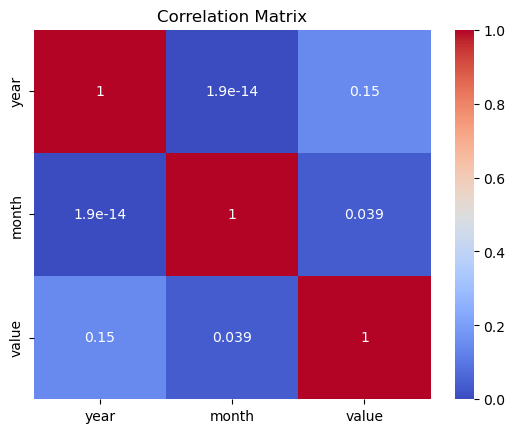

In [30]:
# Correlation between year/month and malaria cases
corr_matrix = data[['year', 'month', 'value']].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Conclusion:
- The correlations show that neither the month nor the year alone has a strong linear relationship with malaria cases.
- Other factors not included in this simple correlation (like environmental, geographical, or policy factors) likely play a more significant role in determining malaria case counts.